# Import

In [3]:
import numpy as np
import pandas as pd
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# Read data

In [4]:
df_01 = pd.read_excel('./data/data_past_time_2020_01.xls', sheet_name='Sheet1', header=[0,1])

In [5]:
df_01

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
,(월-일-시),(㎍/㎥),(㎍/㎥),(ppm),(ppm),(ppm),(ppm)
0,01-01-01,24.0,19.0,0.002,0.036,0.5,0.003
1,01-01-02,25.0,21.0,0.001,0.039,0.6,0.003
2,01-01-03,29.0,23.0,0.001,0.037,0.9,0.003
3,01-01-04,26.0,22.0,0.001,0.036,0.6,0.002
4,01-01-05,25.0,19.0,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...,...
739,01-31-20,43.0,36.0,0.016,0.035,0.6,0.003
740,01-31-21,44.0,37.0,0.017,0.033,0.6,0.003
741,01-31-22,42.0,35.0,0.024,0.025,0.5,0.003


In [6]:
df_02 = pd.read_excel('./data/data_past_time_2020_02.xls', sheet_name='Sheet1', header=[0,1])
df_03 = pd.read_excel('./data/data_past_time_2020_03.xls', sheet_name='Sheet1', header=[0,1])

In [7]:
df_01_03 = pd.concat([df_01, df_02, df_03], ignore_index=True)

In [8]:
df_pm25 = df_01_03[['날짜', 'PM2.5']]

In [9]:
df_pm25

,날짜,PM2.5
,(월-일-시),(㎍/㎥)
0,01-01-01,19.0
1,01-01-02,21.0
2,01-01-03,23.0
3,01-01-04,22.0
4,01-01-05,19.0
...,...,...
2179,03-31-20,22.0
2180,03-31-21,23.0
2181,03-31-22,22.0


In [10]:
df_pm25.isnull().sum()

날짜     (월-일-시)     0
PM2.5  (㎍/㎥)      12
dtype: int64

In [11]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (날짜, (월-일-시))   2184 non-null   object 
 1   (PM2.5, (㎍/㎥))  2172 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [12]:
df_pm25 = df_pm25.fillna(method='ffill')

In [13]:
df_pm25.isnull().sum()

날짜     (월-일-시)    0
PM2.5  (㎍/㎥)      0
dtype: int64

In [14]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (날짜, (월-일-시))   2184 non-null   object 
 1   (PM2.5, (㎍/㎥))  2184 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [15]:
pm25_seq = array(df_pm25['PM2.5'])

In [16]:
len(pm25_seq)

2184

In [17]:
n_steps = 5
n_features = 1

In [18]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [19]:
# split into samples
X_pm25, y_pm25 = split_sequence(pm25_seq, n_steps)

In [35]:
X_pm25.shape

(2179, 5, 1)

In [20]:
X_pm25 = X_pm25.reshape((X_pm25.shape[0], X_pm25.shape[1], n_features))

In [21]:
X_pm25

array([[[19.],
        [21.],
        [23.],
        [22.],
        [19.]],

       [[21.],
        [23.],
        [22.],
        [19.],
        [19.]],

       [[23.],
        [22.],
        [19.],
        [19.],
        [18.]],

       ...,

       [[35.],
        [29.],
        [24.],
        [22.],
        [23.]],

       [[29.],
        [24.],
        [22.],
        [23.],
        [22.]],

       [[24.],
        [22.],
        [23.],
        [22.],
        [24.]]])

In [22]:
y_pm25

array([[19.],
       [18.],
       [21.],
       ...,
       [22.],
       [24.],
       [24.]])

In [24]:
y_pm25.shape

(2179, 1)

# RNN-LSTM

In [25]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
hist = model.fit(X_pm25, y_pm25, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
218/218 [==============================] - 4s 13ms/step - loss: 301.9322
Epoch 2/10
218/218 [==============================] - 3s 13ms/step - loss: 30.1666
Epoch 3/10
218/218 [==============================] - 3s 13ms/step - loss: 30.0235
Epoch 4/10
218/218 [==============================] - 3s 13ms/step - loss: 23.0429
Epoch 5/10
218/218 [==============================] - 3s 13ms/step - loss: 20.2672
Epoch 6/10
218/218 [==============================] - 3s 13ms/step - loss: 20.0517
Epoch 7/10
218/218 [==============================] - 3s 13ms/step - loss: 25.9522
Epoch 8/10
218/218 [==============================] - 3s 13ms/step - loss: 23.1352
Epoch 9/10
218/218 [==============================] - 3s 13ms/step - loss: 21.5961
Epoch 10/10
218/218 [==============================] - 3s 13ms/step - loss: 23.0206


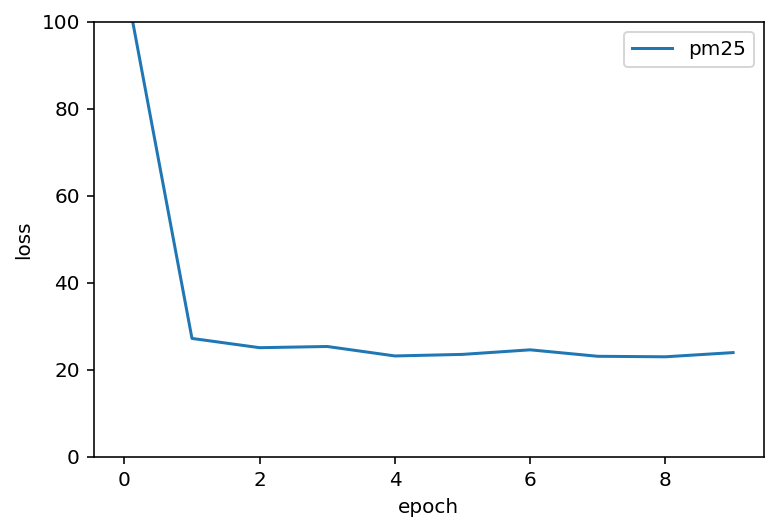

In [26]:
plt.plot(hist.history['loss'])
plt.ylim(0.0, 100.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['pm25'], loc='upper right')
plt.show()

# Forecast PM2.5

In [27]:
april_pm25 = pd.read_excel('./data/data_past_time_2020_04.xls', sheet_name='Sheet1', header=[0,1])

In [28]:
df_april_pm25 = april_pm25[['날짜', 'PM2.5']]

In [58]:
import datetime

#date = pd.to_datetime(april_pm25['날짜'])
date = april_pm25['날짜']
date = array(date)
date

array([['04-01-01'],
       ['04-01-02'],
       ['04-01-03'],
       ['04-01-04'],
       ['04-01-05'],
       ['04-01-06'],
       ['04-01-07'],
       ['04-01-08'],
       ['04-01-09'],
       ['04-01-10'],
       ['04-01-11'],
       ['04-01-12'],
       ['04-01-13'],
       ['04-01-14'],
       ['04-01-15'],
       ['04-01-16'],
       ['04-01-17'],
       ['04-01-18'],
       ['04-01-19'],
       ['04-01-20'],
       ['04-01-21'],
       ['04-01-22'],
       ['04-01-23'],
       ['04-01-24'],
       ['04-02-01'],
       ['04-02-02'],
       ['04-02-03'],
       ['04-02-04'],
       ['04-02-05'],
       ['04-02-06'],
       ['04-02-07'],
       ['04-02-08'],
       ['04-02-09'],
       ['04-02-10'],
       ['04-02-11'],
       ['04-02-12'],
       ['04-02-13'],
       ['04-02-14'],
       ['04-02-15'],
       ['04-02-16'],
       ['04-02-17'],
       ['04-02-18'],
       ['04-02-19'],
       ['04-02-20'],
       ['04-02-21'],
       ['04-02-22'],
       ['04-02-23'],
       ['04-0

In [50]:
# d = pd.to_datetime(april_pm25['날짜'], format='%d/%m/%y %H:%M:%S')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [29]:
df_april_pm25.isnull().sum()

날짜     (월-일-시)    0
PM2.5  (㎍/㎥)      6
dtype: int64

In [30]:
df_april_pm25 = df_april_pm25.fillna(method='ffill')

In [31]:
df_april_pm25.isnull().sum()

날짜     (월-일-시)    0
PM2.5  (㎍/㎥)      0
dtype: int64

In [32]:
april_pm25_seq = array(df_april_pm25["PM2.5"])

In [33]:
X_april_pm25, y_april_pm25 = split_sequence(april_pm25_seq, n_steps)

In [34]:
X_april_pm25[:20]

array([[[24.],
        [26.],
        [34.],
        [45.],
        [43.]],

       [[26.],
        [34.],
        [45.],
        [43.],
        [44.]],

       [[34.],
        [45.],
        [43.],
        [44.],
        [47.]],

       [[45.],
        [43.],
        [44.],
        [47.],
        [43.]],

       [[43.],
        [44.],
        [47.],
        [43.],
        [44.]],

       [[44.],
        [47.],
        [43.],
        [44.],
        [41.]],

       [[47.],
        [43.],
        [44.],
        [41.],
        [43.]],

       [[43.],
        [44.],
        [41.],
        [43.],
        [44.]],

       [[44.],
        [41.],
        [43.],
        [44.],
        [48.]],

       [[41.],
        [43.],
        [44.],
        [48.],
        [52.]],

       [[43.],
        [44.],
        [48.],
        [52.],
        [50.]],

       [[44.],
        [48.],
        [52.],
        [50.],
        [27.]],

       [[48.],
        [52.],
        [50.],
        [27.],
        [18.]],


In [36]:
y_april_pm25[:20]

array([[44.],
       [47.],
       [43.],
       [44.],
       [41.],
       [43.],
       [44.],
       [48.],
       [52.],
       [50.],
       [27.],
       [18.],
       [13.],
       [13.],
       [20.],
       [25.],
       [19.],
       [19.],
       [19.],
       [21.]])

In [37]:
X_april_pm25 = X_april_pm25.reshape((X_april_pm25.shape[0], X_april_pm25.shape[1], n_features))

In [38]:
y_april_forecast = model.predict(X_april_pm25)

In [59]:
date

array([['04-01-01'],
       ['04-01-02'],
       ['04-01-03'],
       ['04-01-04'],
       ['04-01-05'],
       ['04-01-06'],
       ['04-01-07'],
       ['04-01-08'],
       ['04-01-09'],
       ['04-01-10'],
       ['04-01-11'],
       ['04-01-12'],
       ['04-01-13'],
       ['04-01-14'],
       ['04-01-15'],
       ['04-01-16'],
       ['04-01-17'],
       ['04-01-18'],
       ['04-01-19'],
       ['04-01-20'],
       ['04-01-21'],
       ['04-01-22'],
       ['04-01-23'],
       ['04-01-24'],
       ['04-02-01'],
       ['04-02-02'],
       ['04-02-03'],
       ['04-02-04'],
       ['04-02-05'],
       ['04-02-06'],
       ['04-02-07'],
       ['04-02-08'],
       ['04-02-09'],
       ['04-02-10'],
       ['04-02-11'],
       ['04-02-12'],
       ['04-02-13'],
       ['04-02-14'],
       ['04-02-15'],
       ['04-02-16'],
       ['04-02-17'],
       ['04-02-18'],
       ['04-02-19'],
       ['04-02-20'],
       ['04-02-21'],
       ['04-02-22'],
       ['04-02-23'],
       ['04-0

ConversionError: Failed to convert value(s) to axis units: array([['04-01-01'],
       ['04-01-02'],
       ['04-01-03'],
       ['04-01-04'],
       ['04-01-05'],
       ['04-01-06'],
       ['04-01-07'],
       ['04-01-08'],
       ['04-01-09'],
       ['04-01-10'],
       ['04-01-11'],
       ['04-01-12'],
       ['04-01-13'],
       ['04-01-14'],
       ['04-01-15'],
       ['04-01-16'],
       ['04-01-17'],
       ['04-01-18'],
       ['04-01-19'],
       ['04-01-20'],
       ['04-01-21'],
       ['04-01-22'],
       ['04-01-23'],
       ['04-01-24'],
       ['04-02-01'],
       ['04-02-02'],
       ['04-02-03'],
       ['04-02-04'],
       ['04-02-05'],
       ['04-02-06'],
       ['04-02-07'],
       ['04-02-08'],
       ['04-02-09'],
       ['04-02-10'],
       ['04-02-11'],
       ['04-02-12'],
       ['04-02-13'],
       ['04-02-14'],
       ['04-02-15'],
       ['04-02-16'],
       ['04-02-17'],
       ['04-02-18'],
       ['04-02-19'],
       ['04-02-20'],
       ['04-02-21'],
       ['04-02-22'],
       ['04-02-23'],
       ['04-02-24'],
       ['04-03-01'],
       ['04-03-02'],
       ['04-03-03'],
       ['04-03-04'],
       ['04-03-05'],
       ['04-03-06'],
       ['04-03-07'],
       ['04-03-08'],
       ['04-03-09'],
       ['04-03-10'],
       ['04-03-11'],
       ['04-03-12'],
       ['04-03-13'],
       ['04-03-14'],
       ['04-03-15'],
       ['04-03-16'],
       ['04-03-17'],
       ['04-03-18'],
       ['04-03-19'],
       ['04-03-20'],
       ['04-03-21'],
       ['04-03-22'],
       ['04-03-23'],
       ['04-03-24'],
       ['04-04-01'],
       ['04-04-02'],
       ['04-04-03'],
       ['04-04-04'],
       ['04-04-05'],
       ['04-04-06'],
       ['04-04-07'],
       ['04-04-08'],
       ['04-04-09'],
       ['04-04-10'],
       ['04-04-11'],
       ['04-04-12'],
       ['04-04-13'],
       ['04-04-14'],
       ['04-04-15'],
       ['04-04-16'],
       ['04-04-17'],
       ['04-04-18'],
       ['04-04-19'],
       ['04-04-20'],
       ['04-04-21'],
       ['04-04-22'],
       ['04-04-23'],
       ['04-04-24'],
       ['04-05-01'],
       ['04-05-02'],
       ['04-05-03'],
       ['04-05-04'],
       ['04-05-05'],
       ['04-05-06'],
       ['04-05-07'],
       ['04-05-08'],
       ['04-05-09'],
       ['04-05-10'],
       ['04-05-11'],
       ['04-05-12'],
       ['04-05-13'],
       ['04-05-14'],
       ['04-05-15'],
       ['04-05-16'],
       ['04-05-17'],
       ['04-05-18'],
       ['04-05-19'],
       ['04-05-20'],
       ['04-05-21'],
       ['04-05-22'],
       ['04-05-23'],
       ['04-05-24'],
       ['04-06-01'],
       ['04-06-02'],
       ['04-06-03'],
       ['04-06-04'],
       ['04-06-05'],
       ['04-06-06'],
       ['04-06-07'],
       ['04-06-08'],
       ['04-06-09'],
       ['04-06-10'],
       ['04-06-11'],
       ['04-06-12'],
       ['04-06-13'],
       ['04-06-14'],
       ['04-06-15'],
       ['04-06-16'],
       ['04-06-17'],
       ['04-06-18'],
       ['04-06-19'],
       ['04-06-20'],
       ['04-06-21'],
       ['04-06-22'],
       ['04-06-23'],
       ['04-06-24'],
       ['04-07-01'],
       ['04-07-02'],
       ['04-07-03'],
       ['04-07-04'],
       ['04-07-05'],
       ['04-07-06'],
       ['04-07-07'],
       ['04-07-08'],
       ['04-07-09'],
       ['04-07-10'],
       ['04-07-11'],
       ['04-07-12'],
       ['04-07-13'],
       ['04-07-14'],
       ['04-07-15'],
       ['04-07-16'],
       ['04-07-17'],
       ['04-07-18'],
       ['04-07-19'],
       ['04-07-20'],
       ['04-07-21'],
       ['04-07-22'],
       ['04-07-23'],
       ['04-07-24'],
       ['04-08-01'],
       ['04-08-02'],
       ['04-08-03'],
       ['04-08-04'],
       ['04-08-05'],
       ['04-08-06'],
       ['04-08-07'],
       ['04-08-08'],
       ['04-08-09'],
       ['04-08-10'],
       ['04-08-11'],
       ['04-08-12'],
       ['04-08-13'],
       ['04-08-14'],
       ['04-08-15'],
       ['04-08-16'],
       ['04-08-17'],
       ['04-08-18'],
       ['04-08-19'],
       ['04-08-20'],
       ['04-08-21'],
       ['04-08-22'],
       ['04-08-23'],
       ['04-08-24'],
       ['04-09-01'],
       ['04-09-02'],
       ['04-09-03'],
       ['04-09-04'],
       ['04-09-05'],
       ['04-09-06'],
       ['04-09-07'],
       ['04-09-08'],
       ['04-09-09'],
       ['04-09-10'],
       ['04-09-11'],
       ['04-09-12'],
       ['04-09-13'],
       ['04-09-14'],
       ['04-09-15'],
       ['04-09-16'],
       ['04-09-17'],
       ['04-09-18'],
       ['04-09-19'],
       ['04-09-20'],
       ['04-09-21'],
       ['04-09-22'],
       ['04-09-23'],
       ['04-09-24'],
       ['04-10-01'],
       ['04-10-02'],
       ['04-10-03'],
       ['04-10-04'],
       ['04-10-05'],
       ['04-10-06'],
       ['04-10-07'],
       ['04-10-08'],
       ['04-10-09'],
       ['04-10-10'],
       ['04-10-11'],
       ['04-10-12'],
       ['04-10-13'],
       ['04-10-14'],
       ['04-10-15'],
       ['04-10-16'],
       ['04-10-17'],
       ['04-10-18'],
       ['04-10-19'],
       ['04-10-20'],
       ['04-10-21'],
       ['04-10-22'],
       ['04-10-23'],
       ['04-10-24'],
       ['04-11-01'],
       ['04-11-02'],
       ['04-11-03'],
       ['04-11-04'],
       ['04-11-05'],
       ['04-11-06'],
       ['04-11-07'],
       ['04-11-08'],
       ['04-11-09'],
       ['04-11-10'],
       ['04-11-11'],
       ['04-11-12'],
       ['04-11-13'],
       ['04-11-14'],
       ['04-11-15'],
       ['04-11-16'],
       ['04-11-17'],
       ['04-11-18'],
       ['04-11-19'],
       ['04-11-20'],
       ['04-11-21'],
       ['04-11-22'],
       ['04-11-23'],
       ['04-11-24'],
       ['04-12-01'],
       ['04-12-02'],
       ['04-12-03'],
       ['04-12-04'],
       ['04-12-05'],
       ['04-12-06'],
       ['04-12-07'],
       ['04-12-08'],
       ['04-12-09'],
       ['04-12-10'],
       ['04-12-11'],
       ['04-12-12'],
       ['04-12-13'],
       ['04-12-14'],
       ['04-12-15'],
       ['04-12-16'],
       ['04-12-17'],
       ['04-12-18'],
       ['04-12-19'],
       ['04-12-20'],
       ['04-12-21'],
       ['04-12-22'],
       ['04-12-23'],
       ['04-12-24'],
       ['04-13-01'],
       ['04-13-02'],
       ['04-13-03'],
       ['04-13-04'],
       ['04-13-05'],
       ['04-13-06'],
       ['04-13-07'],
       ['04-13-08'],
       ['04-13-09'],
       ['04-13-10'],
       ['04-13-11'],
       ['04-13-12'],
       ['04-13-13'],
       ['04-13-14'],
       ['04-13-15'],
       ['04-13-16'],
       ['04-13-17'],
       ['04-13-18'],
       ['04-13-19'],
       ['04-13-20'],
       ['04-13-21'],
       ['04-13-22'],
       ['04-13-23'],
       ['04-13-24'],
       ['04-14-01'],
       ['04-14-02'],
       ['04-14-03'],
       ['04-14-04'],
       ['04-14-05'],
       ['04-14-06'],
       ['04-14-07'],
       ['04-14-08'],
       ['04-14-09'],
       ['04-14-10'],
       ['04-14-11'],
       ['04-14-12'],
       ['04-14-13'],
       ['04-14-14'],
       ['04-14-15'],
       ['04-14-16'],
       ['04-14-17'],
       ['04-14-18'],
       ['04-14-19'],
       ['04-14-20'],
       ['04-14-21'],
       ['04-14-22'],
       ['04-14-23'],
       ['04-14-24'],
       ['04-15-01'],
       ['04-15-02'],
       ['04-15-03'],
       ['04-15-04'],
       ['04-15-05'],
       ['04-15-06'],
       ['04-15-07'],
       ['04-15-08'],
       ['04-15-09'],
       ['04-15-10'],
       ['04-15-11'],
       ['04-15-12'],
       ['04-15-13'],
       ['04-15-14'],
       ['04-15-15'],
       ['04-15-16'],
       ['04-15-17'],
       ['04-15-18'],
       ['04-15-19'],
       ['04-15-20'],
       ['04-15-21'],
       ['04-15-22'],
       ['04-15-23'],
       ['04-15-24'],
       ['04-16-01'],
       ['04-16-02'],
       ['04-16-03'],
       ['04-16-04'],
       ['04-16-05'],
       ['04-16-06'],
       ['04-16-07'],
       ['04-16-08'],
       ['04-16-09'],
       ['04-16-10'],
       ['04-16-11'],
       ['04-16-12'],
       ['04-16-13'],
       ['04-16-14'],
       ['04-16-15'],
       ['04-16-16'],
       ['04-16-17'],
       ['04-16-18'],
       ['04-16-19'],
       ['04-16-20'],
       ['04-16-21'],
       ['04-16-22'],
       ['04-16-23'],
       ['04-16-24'],
       ['04-17-01'],
       ['04-17-02'],
       ['04-17-03'],
       ['04-17-04'],
       ['04-17-05'],
       ['04-17-06'],
       ['04-17-07'],
       ['04-17-08'],
       ['04-17-09'],
       ['04-17-10'],
       ['04-17-11'],
       ['04-17-12'],
       ['04-17-13'],
       ['04-17-14'],
       ['04-17-15'],
       ['04-17-16'],
       ['04-17-17'],
       ['04-17-18'],
       ['04-17-19'],
       ['04-17-20'],
       ['04-17-21'],
       ['04-17-22'],
       ['04-17-23'],
       ['04-17-24'],
       ['04-18-01'],
       ['04-18-02'],
       ['04-18-03'],
       ['04-18-04'],
       ['04-18-05'],
       ['04-18-06'],
       ['04-18-07'],
       ['04-18-08'],
       ['04-18-09'],
       ['04-18-10'],
       ['04-18-11'],
       ['04-18-12'],
       ['04-18-13'],
       ['04-18-14'],
       ['04-18-15'],
       ['04-18-16'],
       ['04-18-17'],
       ['04-18-18'],
       ['04-18-19'],
       ['04-18-20'],
       ['04-18-21'],
       ['04-18-22'],
       ['04-18-23'],
       ['04-18-24'],
       ['04-19-01'],
       ['04-19-02'],
       ['04-19-03'],
       ['04-19-04'],
       ['04-19-05'],
       ['04-19-06'],
       ['04-19-07'],
       ['04-19-08'],
       ['04-19-09'],
       ['04-19-10'],
       ['04-19-11'],
       ['04-19-12'],
       ['04-19-13'],
       ['04-19-14'],
       ['04-19-15'],
       ['04-19-16'],
       ['04-19-17'],
       ['04-19-18'],
       ['04-19-19'],
       ['04-19-20'],
       ['04-19-21'],
       ['04-19-22'],
       ['04-19-23'],
       ['04-19-24'],
       ['04-20-01'],
       ['04-20-02'],
       ['04-20-03'],
       ['04-20-04'],
       ['04-20-05'],
       ['04-20-06'],
       ['04-20-07'],
       ['04-20-08'],
       ['04-20-09'],
       ['04-20-10'],
       ['04-20-11'],
       ['04-20-12'],
       ['04-20-13'],
       ['04-20-14'],
       ['04-20-15'],
       ['04-20-16'],
       ['04-20-17'],
       ['04-20-18'],
       ['04-20-19'],
       ['04-20-20'],
       ['04-20-21'],
       ['04-20-22'],
       ['04-20-23'],
       ['04-20-24'],
       ['04-21-01'],
       ['04-21-02'],
       ['04-21-03'],
       ['04-21-04'],
       ['04-21-05'],
       ['04-21-06'],
       ['04-21-07'],
       ['04-21-08'],
       ['04-21-09'],
       ['04-21-10'],
       ['04-21-11'],
       ['04-21-12'],
       ['04-21-13'],
       ['04-21-14'],
       ['04-21-15'],
       ['04-21-16'],
       ['04-21-17'],
       ['04-21-18'],
       ['04-21-19'],
       ['04-21-20'],
       ['04-21-21'],
       ['04-21-22'],
       ['04-21-23'],
       ['04-21-24'],
       ['04-22-01'],
       ['04-22-02'],
       ['04-22-03'],
       ['04-22-04'],
       ['04-22-05'],
       ['04-22-06'],
       ['04-22-07'],
       ['04-22-08'],
       ['04-22-09'],
       ['04-22-10'],
       ['04-22-11'],
       ['04-22-12'],
       ['04-22-13'],
       ['04-22-14'],
       ['04-22-15'],
       ['04-22-16'],
       ['04-22-17'],
       ['04-22-18'],
       ['04-22-19'],
       ['04-22-20'],
       ['04-22-21'],
       ['04-22-22'],
       ['04-22-23'],
       ['04-22-24'],
       ['04-23-01'],
       ['04-23-02'],
       ['04-23-03'],
       ['04-23-04'],
       ['04-23-05'],
       ['04-23-06'],
       ['04-23-07'],
       ['04-23-08'],
       ['04-23-09'],
       ['04-23-10'],
       ['04-23-11'],
       ['04-23-12'],
       ['04-23-13'],
       ['04-23-14'],
       ['04-23-15'],
       ['04-23-16'],
       ['04-23-17'],
       ['04-23-18'],
       ['04-23-19'],
       ['04-23-20'],
       ['04-23-21'],
       ['04-23-22'],
       ['04-23-23'],
       ['04-23-24'],
       ['04-24-01'],
       ['04-24-02'],
       ['04-24-03'],
       ['04-24-04'],
       ['04-24-05'],
       ['04-24-06'],
       ['04-24-07'],
       ['04-24-08'],
       ['04-24-09'],
       ['04-24-10'],
       ['04-24-11'],
       ['04-24-12'],
       ['04-24-13'],
       ['04-24-14'],
       ['04-24-15'],
       ['04-24-16'],
       ['04-24-17'],
       ['04-24-18'],
       ['04-24-19'],
       ['04-24-20'],
       ['04-24-21'],
       ['04-24-22'],
       ['04-24-23'],
       ['04-24-24'],
       ['04-25-01'],
       ['04-25-02'],
       ['04-25-03'],
       ['04-25-04'],
       ['04-25-05'],
       ['04-25-06'],
       ['04-25-07'],
       ['04-25-08'],
       ['04-25-09'],
       ['04-25-10'],
       ['04-25-11'],
       ['04-25-12'],
       ['04-25-13'],
       ['04-25-14'],
       ['04-25-15'],
       ['04-25-16'],
       ['04-25-17'],
       ['04-25-18'],
       ['04-25-19'],
       ['04-25-20'],
       ['04-25-21'],
       ['04-25-22'],
       ['04-25-23'],
       ['04-25-24'],
       ['04-26-01'],
       ['04-26-02'],
       ['04-26-03'],
       ['04-26-04'],
       ['04-26-05'],
       ['04-26-06'],
       ['04-26-07'],
       ['04-26-08'],
       ['04-26-09'],
       ['04-26-10'],
       ['04-26-11'],
       ['04-26-12'],
       ['04-26-13'],
       ['04-26-14'],
       ['04-26-15'],
       ['04-26-16'],
       ['04-26-17'],
       ['04-26-18'],
       ['04-26-19'],
       ['04-26-20'],
       ['04-26-21'],
       ['04-26-22'],
       ['04-26-23'],
       ['04-26-24'],
       ['04-27-01'],
       ['04-27-02'],
       ['04-27-03'],
       ['04-27-04'],
       ['04-27-05'],
       ['04-27-06'],
       ['04-27-07'],
       ['04-27-08'],
       ['04-27-09'],
       ['04-27-10'],
       ['04-27-11'],
       ['04-27-12'],
       ['04-27-13'],
       ['04-27-14'],
       ['04-27-15'],
       ['04-27-16'],
       ['04-27-17'],
       ['04-27-18'],
       ['04-27-19'],
       ['04-27-20'],
       ['04-27-21'],
       ['04-27-22'],
       ['04-27-23'],
       ['04-27-24'],
       ['04-28-01'],
       ['04-28-02'],
       ['04-28-03'],
       ['04-28-04'],
       ['04-28-05'],
       ['04-28-06'],
       ['04-28-07'],
       ['04-28-08'],
       ['04-28-09'],
       ['04-28-10'],
       ['04-28-11'],
       ['04-28-12'],
       ['04-28-13'],
       ['04-28-14'],
       ['04-28-15'],
       ['04-28-16'],
       ['04-28-17'],
       ['04-28-18'],
       ['04-28-19'],
       ['04-28-20'],
       ['04-28-21'],
       ['04-28-22'],
       ['04-28-23'],
       ['04-28-24'],
       ['04-29-01'],
       ['04-29-02'],
       ['04-29-03'],
       ['04-29-04'],
       ['04-29-05'],
       ['04-29-06'],
       ['04-29-07'],
       ['04-29-08'],
       ['04-29-09'],
       ['04-29-10'],
       ['04-29-11'],
       ['04-29-12'],
       ['04-29-13'],
       ['04-29-14'],
       ['04-29-15'],
       ['04-29-16'],
       ['04-29-17'],
       ['04-29-18'],
       ['04-29-19'],
       ['04-29-20'],
       ['04-29-21'],
       ['04-29-22'],
       ['04-29-23'],
       ['04-29-24'],
       ['04-30-01'],
       ['04-30-02'],
       ['04-30-03'],
       ['04-30-04'],
       ['04-30-05'],
       ['04-30-06'],
       ['04-30-07'],
       ['04-30-08'],
       ['04-30-09'],
       ['04-30-10'],
       ['04-30-11'],
       ['04-30-12'],
       ['04-30-13'],
       ['04-30-14'],
       ['04-30-15'],
       ['04-30-16'],
       ['04-30-17'],
       ['04-30-18'],
       ['04-30-19'],
       ['04-30-20'],
       ['04-30-21'],
       ['04-30-22'],
       ['04-30-23'],
       ['04-30-24']], dtype=object)

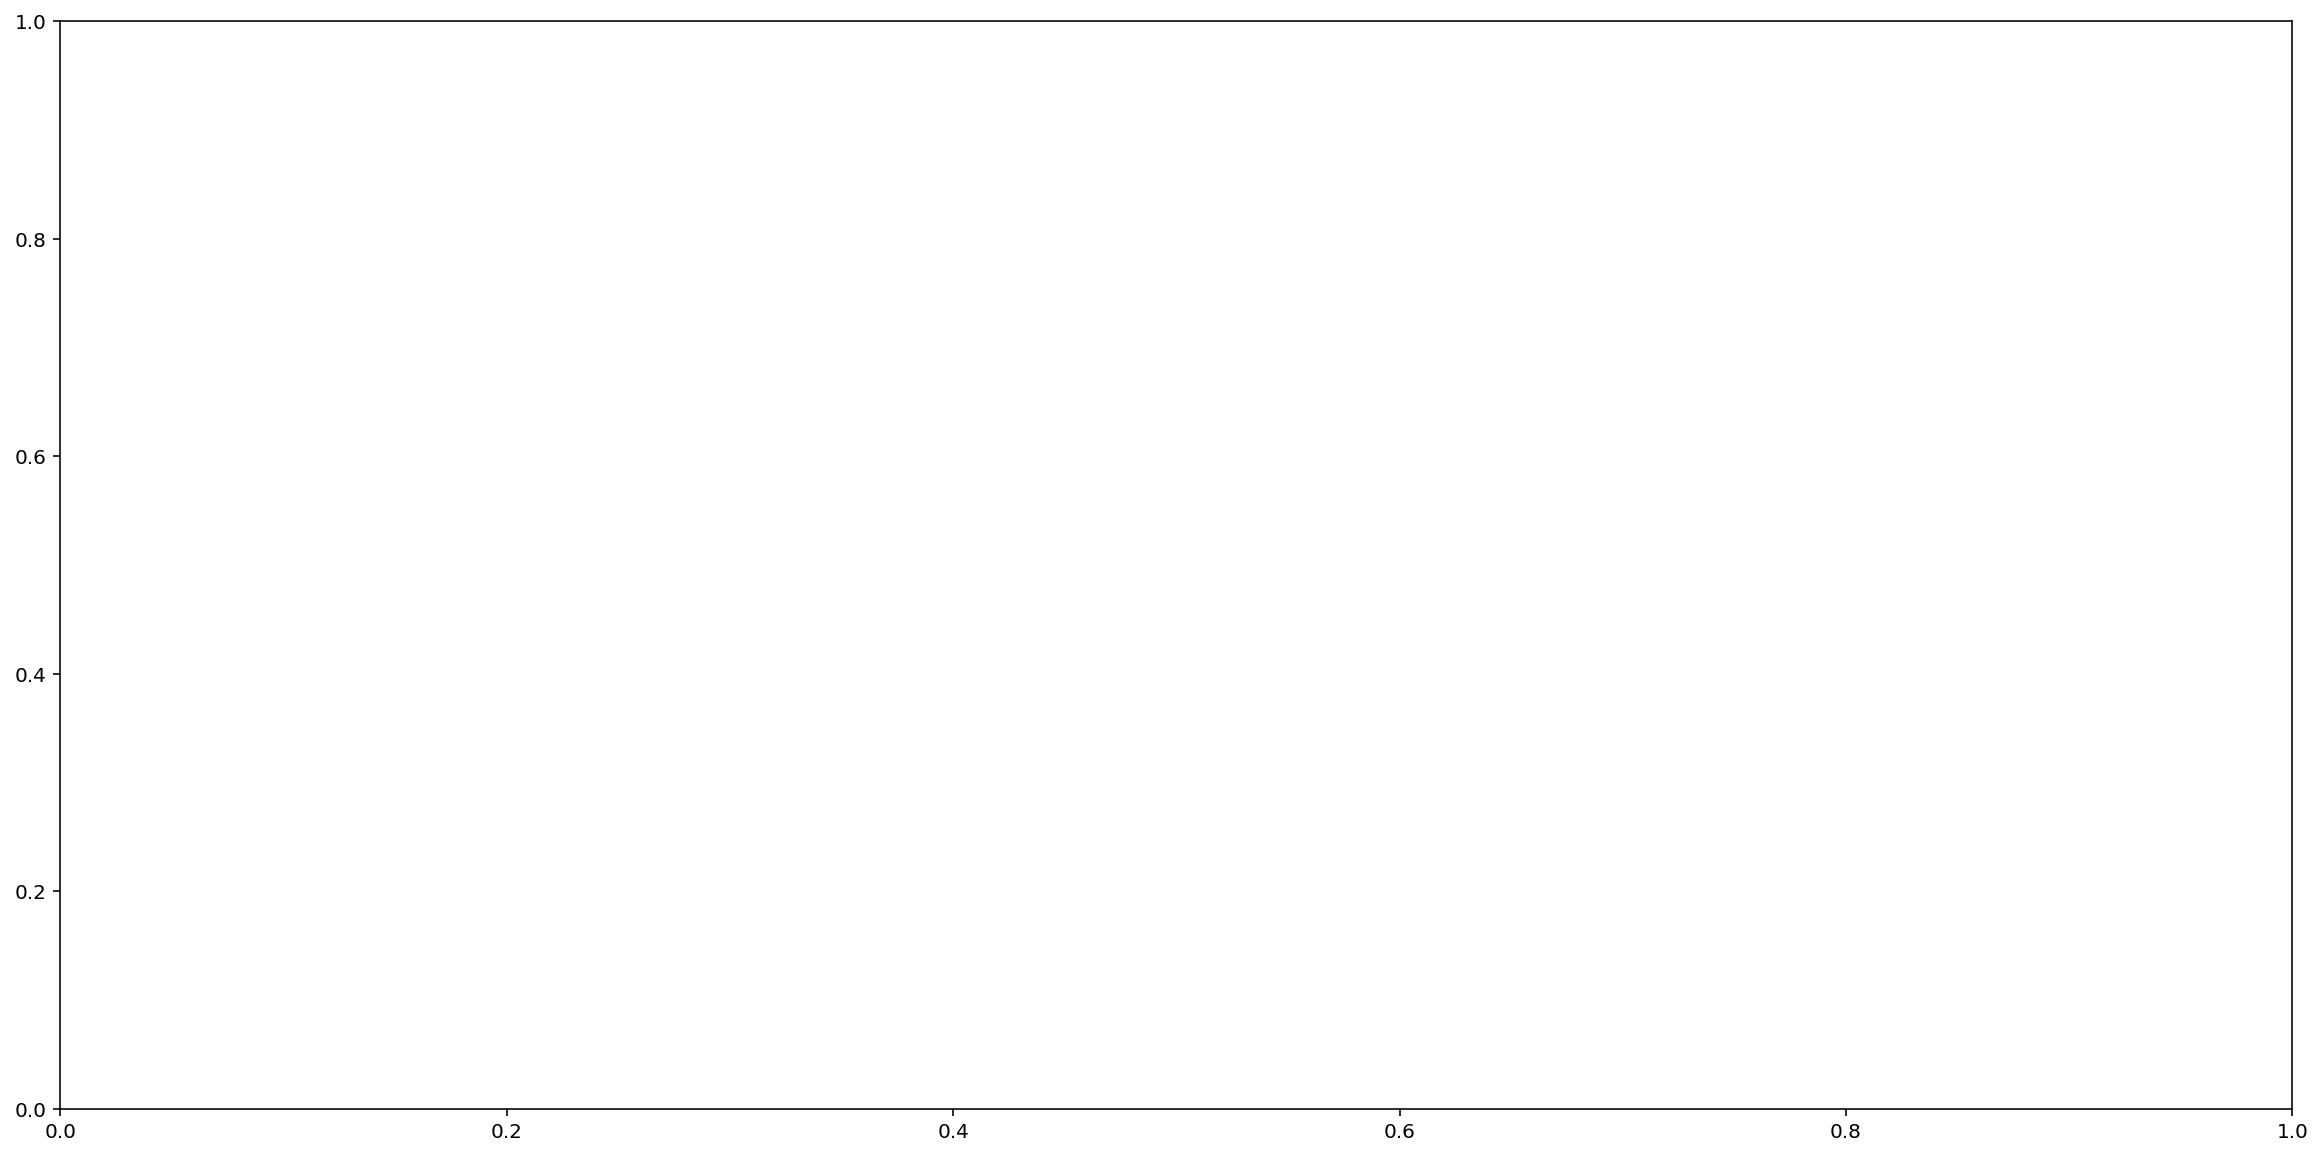

In [61]:
plt.figure(figsize=(20,10))
plt.xticks(date)
plt.plot(y_april_forecast, '#FF4500')
plt.plot(april_pm25_seq, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize=40)
#path = 'C:/Windows/Fonts/NanumGothicBold.ttf'
#fontprop = fm.FontProperties(fname=path, size=40)

plt.title('April PM2.5 Forecast', fontsize=40) # fontproperties=fontprop
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('PM2.5', fontsize = 35)
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_rmse = sqrt(mean_squared_error(y_april_forecast, y_april_pm25))
print(y_rmse)

3.5911024073133935


In [41]:
scores = model.evaluate(X_pm25, y_pm25, batch_size=1)
print(scores)

2179/2179 [==============================] - 5s 2ms/step - loss: 21.9256
21.925621032714844
